In [5]:
import os
os.chdir(os.path.expanduser("~"))

In [6]:
pwd

'/home/jovyan'

In [7]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

# Viraq

### -Viraq is one of 4  internal "Havets Helse" projects
### -lead by Søren Grove and Craig Morton
### -Tomasz Furmanek and Me will in dialog with Søren and Craig be Leading a workpackage for bioinformatic analysis and infrastructure

### -Analysis of viral composition in water samples as well as in diseased fish
### -Analysis of Viral subtype evolution and distribution
### -will be utilizing long read nanopore and pacbio sequencing

In [8]:
from IPython.display import IFrame
IFrame(src='2019-10-15.png', width=1600, height=800)

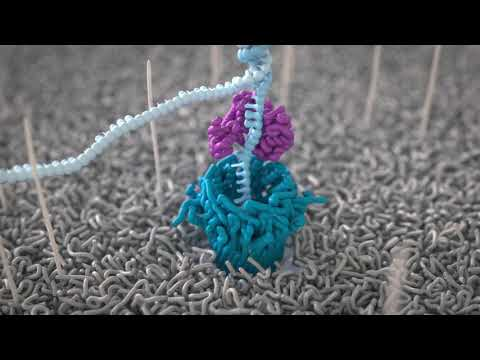

In [9]:
hide_toggle(for_next=True)
from IPython.lib.display import YouTubeVideo
YouTubeVideo('RcP85JHLmnI',width=1200, height=800)

In [10]:
from IPython.core.display import SVG
SVG(filename='viraq/nanopore_seq.svg')

FileNotFoundError: [Errno 2] No such file or directory: 'viraq/nanopore_seq.svg'

In [11]:
from IPython.core.display import SVG
SVG(filename='viraq/metagenomics_viraq.svg')

FileNotFoundError: [Errno 2] No such file or directory: 'viraq/metagenomics_viraq.svg'

In [12]:
from IPython.display import IFrame
IFrame(src='kaio74_viraq_ scripts for metagenomic analysis of long reads.html', width=1600, height=800)

# subsampling and QC check

In [13]:
!cd ~
!mkdir -p viraq/QC
!mkdir -p viraq/kaiju_results

# define name of SRA file
SRAname='SRR7946391'
#Get file from SRA accession
!prefetch $SRAname

#input file directory
SRAfiles='ncbi/public/sra'
#quality check path
QC1_sub='viraq/QC/'+SRAname+'_sub'

#convert to fastq
os.chdir(SRAfiles)
!fastq-dump $SRAname

#subsampling
fastqfile=SRAfiles+'/'+SRAname +'.fastq'
os.chdir(os.path.expanduser("~"))
subsample=SRAfiles+'/'+SRAname+'_sub.fq.gz'
!seqtk sample $fastqfile 5000 | gzip > $subsample
!nanoQC -o $QC1_sub $subsample


2019-10-16T19:30:49 prefetch.2.8.2: 1) Downloading 'SRR7946391'...
2019-10-16T19:30:49 prefetch.2.8.2:  Downloading via https...
2019-10-16T19:30:52 prefetch.2.8.2: 1) 'SRR7946391' was downloaded successfully
2019-10-16T19:30:52 prefetch.2.8.2: 'SRR7946391' has 0 unresolved dependencies
Read 85711 spots for SRR7946391
Written 85711 spots for SRR7946391


In [29]:
from IPython.display import IFrame
IFrame(src='viraq/QC/SRR7946391_sub/nanoQC.html', width=1200, height=800)

# taxonomic assignment using Kaiju

In [44]:
#can test with smaller virus database to run faster
kaijudb2='kaiju_db_viruses.fmi'
kaijudbpath2='kaiju/db/viruses'+'/'+kaijudb2

kaijuresults_sub2= 'viraq/kaiju_results/'+SRAname+'_sub_viralref'
kronaresults_sub2= 'viraq/kaiju_results/'+SRAname+'_Krona_sub_viralref'
kronasub2html='viraq/kaiju_results/'+SRAname+'_Krona_sub_viralref.html'

!kaiju -t kaiju/db/nodes.dmp -f $kaijudbpath2 -i $subsample -z 8 -a greedy -e 5 -v -o $kaijuresults_sub2
!kaiju2krona -t kaiju/db/nodes.dmp -n kaiju/db/names.dmp -i $kaijuresults_sub2 -o $kronaresults_sub2
!ktImportText -o $kronasub2html $kronaresults_sub2

19:42:25 Reading database
 Reading taxonomic tree from file kaiju/db/nodes.dmp
 Reading index from file kaiju/db/viruses/kaiju_db_viruses.fmi
Output file: viraq/kaiju_results/SRR7946391_sub_viralref
19:42:26 Start classification using 8 threads.
19:42:52 Finished.
Writing viraq/kaiju_results/SRR7946391_Krona_sub_viralref.html...


In [46]:
IFrame(src='viraq/kaiju_results/SRR7946391_Krona_sub_viralref.html', width=1400, height=800)

# Further tasks to be completed:



## -Setting up and running the  Nanopore sequencing minion cells on our own samples: scedueled delivery of the minion chips are 28.10.2019


## -Preparing scripts for 1) binning reads according to taxonomic assignment and 2.) assembly and polishing of viral genomes.